In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [107]:
total = pd.read_csv('us.csv', header=0, sep=',')
total.head(10)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
5,2020-01-26,5,0
6,2020-01-27,5,0
7,2020-01-28,5,0
8,2020-01-29,5,0
9,2020-01-30,6,0


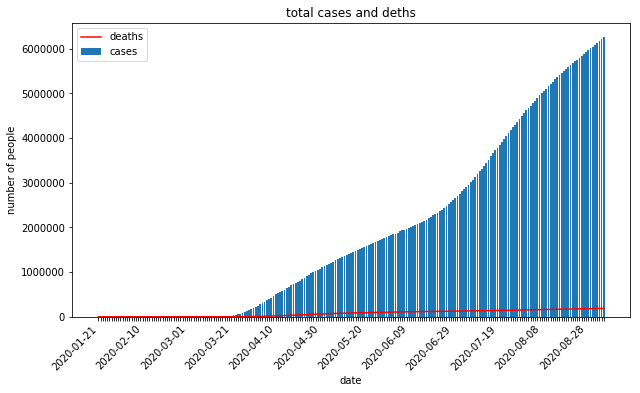

In [80]:
fig = plt.figure(figsize = (10,6))
plt.bar(total.date, 
         total.cases,  
         label = 'cases'
        )
plt.plot(total.date, 
        total.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)
    
plt.title('total cases and deths')
plt.xlabel('date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [108]:
new_increase = pd.DataFrame()

new_increase['date'] = total['date']

new_increase_cases = total['cases'].copy()
new_increase_cases.values[1:] -= new_increase_cases.values[:-1]
new_increase['cases'] = new_increase_cases

new_increase_deaths = total['deaths'].copy()
new_increase_deaths.values[1:] -= new_increase_deaths.values[:-1]
new_increase['deaths'] = new_increase_deaths

new_increase.head(10)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,0,0
2,2020-01-23,0,0
3,2020-01-24,1,0
4,2020-01-25,1,0
5,2020-01-26,2,0
6,2020-01-27,0,0
7,2020-01-28,0,0
8,2020-01-29,0,0
9,2020-01-30,1,0


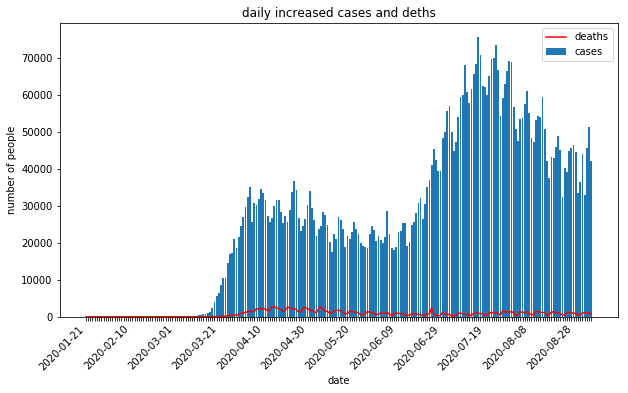

In [83]:
fig = plt.figure(figsize = (10,6))
plt.bar(new_increase.date, 
         new_increase.cases,  
         label = 'cases'
        )
plt.plot(new_increase.date, 
        new_increase.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)
    
plt.title('daily increased cases and deths')
plt.xlabel('date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()

In [112]:
# 7-Day Moving Average
average7 = pd.DataFrame()

average7['date'] = new_increase['date']

N = 7
n = np.ones(N)
weights = n/N

new_increase_cases = new_increase['cases'].values
average7_cases = pd.Series(np.convolve(weights, new_increase_cases)[:new_increase_cases.shape[0]])
average7['cases'] = average7_cases

new_increase_deaths = new_increase['deaths'].values
average7_deaths = pd.Series(np.convolve(weights, new_increase_deaths)[:new_increase_deaths.shape[0]])
average7['deaths'] = average7_deaths

average7.head(10)

,date,cases,deaths
0,2020-01-21,0.142857,0.0
1,2020-01-22,0.142857,0.0
2,2020-01-23,0.142857,0.0
3,2020-01-24,0.285714,0.0
4,2020-01-25,0.428571,0.0
5,2020-01-26,0.714286,0.0
6,2020-01-27,0.714286,0.0
7,2020-01-28,0.571429,0.0
8,2020-01-29,0.571429,0.0
9,2020-01-30,0.714286,0.0


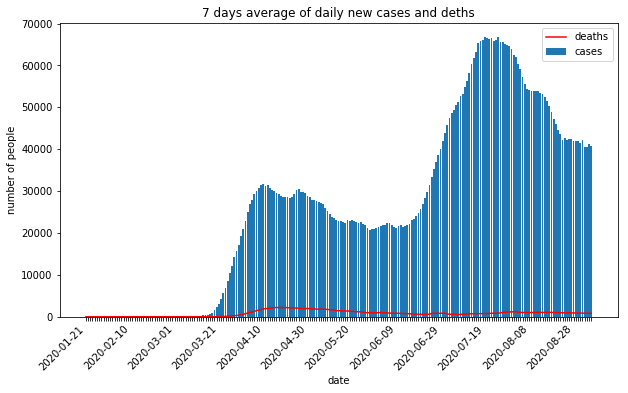

In [114]:
fig = plt.figure(figsize = (10,6))
plt.bar(average7.date, 
         average7.cases,  
         label = 'cases'
        )
plt.plot(average7.date, 
        average7.deaths, 
        linestyle = '-',
        color='red',
        label = 'deaths'
        )

ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)
    
plt.title('7 days average of daily new cases and deths')
plt.xlabel('date')
plt.ylabel('number of people')

fig.autofmt_xdate(rotation = 45)

plt.legend()
plt.show()